**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds23_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb` и полученные данные** (подробности далее). Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Будьте внимательны при работе со сбором данных. Ответственность за корректность ваших действий лежит на вас. Не нагружайте сервера, *делайте паузы между запросами*. Как следствие, начинайте выполнять задание заранее. **Если вас где-то забаннили и т.п., то это не является уважительной причиной продления дедлайна.**
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*

**Перед выполнением задания посмотрите презентацию по выполнению и оформлению домашних заданий с занятия 2.**

---

**Баллы за задание:**

<b><a href="#Легкая-часть" style="text-decoration: none;"><font color="blue">Легкая часть</font></a></b> (достаточно на "хор"):
* Задача 1 &mdash; 60 баллов

<b><a href="#Сложная-часть" style="text-decoration: none;"><font color="orange">Сложная часть</font></a></b> (необходимо на "отл"):
* Задача 2 &mdash; 60 баллов

In [ ]:
# Bot check

# HW_ID: fpmi_ad4
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [ ]:
import requests
from time import sleep
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid', font_scale=1.3, palette='Set2')


Второй курс &mdash; самое время задуматься о будущей профессии и проанализировать существующие предложения. Дело тут даже не в том, чтобы найти интересную стажировку. В первую очередь сейчас стоит подумать о том, в какую сторону развиваться дальше. Например, если вы хотите работать в какой-либо конкретной профессии, то наверняка стоит развивать какие-то определенные навыки, и даже выбрать подходящую кафедру. Анализ существующих вакансий поможет определить, какие навыки вам нужны.

Задание предполагает вариативность исследуемых данных. Вы можете выбрать один из следующих вариантов.
1. Стандартный вариант &mdash; проанализировать вакансии на сайте <a target="_blank" href="https://hh.ru/">hh.ru</a> с использованием <a target="_blank" href="https://dev.hh.ru/">официального API</a>. Далее приведен пример работы с этим API. *Если вы не достаточно уверены в своих силах, рекомендуется выбрать этот вариант.*
2. Разобраться с API других сервисов по поиску вакансий, например, <a target="_blank" href="https://career.habr.com/">Хабр.Карьера</a> или <a target="_blank" href="https://www.superjob.ru/">SuperJob</a>.
3. Извлечение данных с помощью <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#2.-Парсинг-HTML-напрямую">парсинга HTML напрямую</a> некоторых сайтов. Например, вы можете попробовать напрямую распарсить пул вакансий из тех источников, которые не предоставляют API. **Внимание! Обращайте внимание на пользовательские соглашения и на <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html#Сбор-данных-из-открытых-источников">эти рекомендации</a>.**
4. Комбинирование нескольких подходов. В этом случае нужно понимать, как находить одинаковые вакансии из разных источников для избежания их двойного учета.
5. Можно также *дополнительно* брать архивные данные из недавнего прошлого, например, из <a target="_blank" href="https://boosters.pro/championship/HeadHunter/overview/description">этого соревнования</a>.

Перед выполнением задания ознакомьтесь с <a target="_blank" href="https://miptstats.github.io/courses/ad_fivt/data_parsing.html">материалом</a> о сборе данных из открытых источников.

Для получения максимального балла за задание достаточно выполнить все задание по стандартному варианту. Альтернативные варианты, даже более сложные, не дают больше баллов, чем максимальное количество баллов по стандартному варианту.

Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения. Например, если в вакансии зарплата укзана "*от ...*" или  "*до ...*", то вы сами решаете, как это обрабатывать, но не забывайте про четкую аргументацию. Не забывайте также заглядывать в презентацию по выполнению и оформлению домашних заданий с занятия 2.

 ---
### Справка по работе с API сервиса hh.ru.

<b><font color="red">Внимание!</font> При работе с API не забывайте делать паузы между запросами, чтобы не задудосить сервер. Если вас заблокируют, это не будет являться уважительной причиной переноса дедлайна.</b>

Мы будем работать только с вакансиями. Для этого не требуется регистрироваться и получать токен. Ниже приведен краткий пример работы с API. Подробное описание работы с вакансиями, включая параметры запросов и формат ответа можно почитать в <a target="_blank" href="https://github.com/hhru/api/blob/master/docs/vacancies.md#search">документации</a>.

Например, мы хотим найти вакансии по запросу `Data Scientist` в Москве. Тогда первую страницу поиска из 10 вакансий на страницу мы можем получить с запроса к API:

In [ ]:
URL = 'https://api.hh.ru/vacancies'

params = {
    'text': "Data Scientist",
    'area': 1,
    'page': 0,
    'per_page': 10
}

req = requests.get(URL, params)
data = json.loads(req.content.decode())

Если все прошло успешно, полученный словарь будет иметь следующие ключи

In [ ]:
data.keys()

Можем посмотреть на краткое описание первой вакансии

In [ ]:
data['items'][0]

Сколько всего найдено вакансий

In [ ]:
data['found']

Количество страниц в результатах поиска

In [ ]:
data['pages']

Из результатов можем сделать удобную таблицу, причем в дальнейшем можно оставить только те колонки, которые необходимы для анализа.

In [ ]:
# df = pd.json_normalize(data['items'])
a = dict()
a = a | data
df = pd.json_normalize(a['items'])
df.head()

Для получения полного описания вакансии потребуется задать отдельный запрос, используя ее `id`.

### <font color="blue"><i>Легкая часть</i></font>

 ---
### Задача 1.

Исследуем профессию Data Scientist. Найдите как можно больше вакансий по этой профессии в Москве. Учтите, что имеет смысл искать также по другим ключевым словам, например, `аналитик данных`.

In [ ]:
import time

In [ ]:
URL = 'https://api.hh.ru/vacancies'

all_data = list()
for page in range(0, 20):
    params = {
        'text': "Data Scientist",
        'area': 1,
        'page': page,
        'per_page': 100
    }
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    all_data.append(data['items'])
    time.sleep(3)

In [ ]:
for page in range(0, 20):
    params = {
        'text': "аналитик данных",
        'area': 1,
        'page': page,
        'per_page': 100
    }
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    all_data.append(data['items'])
    time.sleep(3)

In [ ]:
df = pd.DataFrame()
for item in all_data:
    for i in item:
        tmp_df = pd.json_normalize(i)
        df = pd.concat([df, tmp_df['id']], axis=0).reset_index(drop=True)
df.columns = ['id']

In [ ]:
df.head()

В полученную выборку некоторые вакансии могли попасть несколько раз. Удалите дубликаты.

In [ ]:
len(df)

In [ ]:
df.drop_duplicates(subset='id', inplace=True)
len(df)

Загрузите подробное описание каждой вакансии и создайте удобную для дальнейших действий таблицу данных.

In [ ]:
res_df = pd.DataFrame()
for idx in range(0, len(df)):
    vacancy = df['id'].iloc[idx]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    tmp_df = pd.json_normalize(vacancy_info)
    res_df = pd.concat([res_df, tmp_df], axis=0).reset_index(drop=True)
    time.sleep(1)

In [ ]:
df.drop(columns=['premium', 'relations', 'insider_interview', 'response_letter_required', 'address', 'allow_messages', 'department', 'contacts', 'branded_description', 'vacancy_constructor_template', 'accept_handicapped', 'accept_kids', 'archived', 'response_url', 'specializations', 'code', 'hidden', 'quick_responses_allowed', 'driver_license_types', 'accept_incomplete_resumes', 'negotiations_url', 'suitable_resumes_url', 'has_test', 'test', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary', 'languages', 'billing_type.id', 'billing_type.name', 'area.url', 'area.name', 'area.id', 'type.id', 'type.name', 'schedule.id', 'schedule.name', 'employment.id', 'employment.name', 'employer.trusted', 'salary', 'address.description', 'address.metro', 'address.metro.line_name', 'address.metro.line_id', 'insider_interview.id', 'insider_interview.url', 'employer.logo_urls', 'vacancy_constructor_template.id', 'vacancy_constructor_template.name', 'vacancy_constructor_template.top_picture.height', 'vacancy_constructor_template.top_picture.width', 'vacancy_constructor_template.top_picture.path', 'vacancy_constructor_template.top_picture.blurred_path', 'vacancy_constructor_template.bottom_picture.height', 'vacancy_constructor_template.bottom_picture.width', 'vacancy_constructor_template.bottom_picture.path', 'vacancy_constructor_template.bottom_picture.blurred_path', 'test.required', 'vacancy_constructor_template.bottom_picture', 'errors', 'request_id', 'initial_created_at', 'created_at', 'published_at', 'address.city', 'address.street', 'address.building', 'address.raw', 'apply_alternate_url', 'alternate_url', 'experience.id', 'employer.url', 'employer.alternate_url', 'employer.logo_urls.original', 'employer.logo_urls.240', 'employer.logo_urls.90', 'employer.vacancies_url', 'department.id', 'department.name'])

Удалим пустые строки

In [ ]:
df.dropna(subset='id', inplace=True)
df.head()

**Полученную таблицу необходимо сохранить в формате xlsx и отправить боту вместе с решением.**

In [ ]:
import openpyxl

In [ ]:
df.to_excel('output.xlsx')

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?

In [ ]:
N = len(df)
N

N = 2778 вакансий доступно

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

Создадим DaraFrame, где в роле колонок будут навыки, а в строке единицами отмечаем требуется ли этот навык в данной вакансии

In [ ]:
skills_df = pd.DataFrame()
for idx in df.index:
    skills_list = df.at[idx, 'key_skills']
    for skill in skills_list:
        skill_name = skill['name']
        skills_df.at[df.at[idx, 'id'], skill_name] = 1

Подсчитаем сумму, отсортируем и посмотрим на 15 самых часто требуемых навыков.

In [ ]:
df_count_skills = skills_df.sum()
df_count_skills = df_count_skills.sort_values(ascending=False).reset_index()
df_count_skills.columns = ['name', 'count']
df_count_skills

Text(0, 0.5, '')

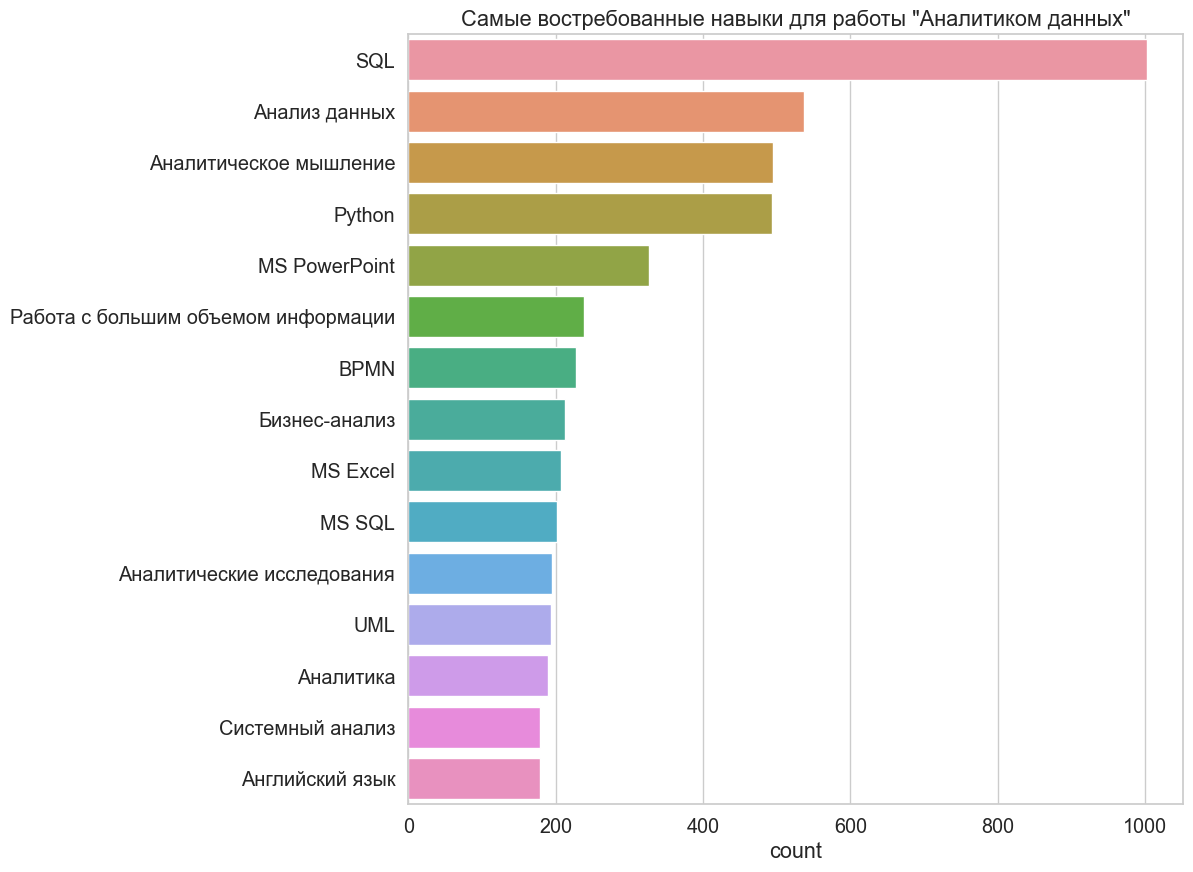

In [1063]:
plt.figure(figsize=(10, 10))
sns.barplot(y=df_count_skills['name'].head(15), x=df_count_skills['count'].head(15))
plt.title('Самые востребованные навыки для работы "Аналитиком данных"')
plt.ylabel('')

Для ясности напомню, что всего у нас в DataFrame **N=2778** вакансий.
На гистограмме видно, что чаще всего требуется знание *SQL*, *Python*, *MS PowerPoint*, *BPMB*, *UNL*, а также иметь *Аналитическое мышление* и знать *Анализ данных*, что звучит очень расплывчато, потому что нашей целью и является узнать какие навыки требуются для профессии *Анализа данных*. Конечно еще стоит отметить, что многие работодатели явно указывают необходимость знания *Английского языка*.

HH.ru в данном случае предлагает нам вакансии очень разные по своей сути, потому что мы видим, что в топ15 нет даже pandas, навык, приходящий в голову одним из первых для работы, которую я подразумеваю под "Аналитиком данных". В любом случае будем работать с данными, которые у нас есть.


**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

In [ ]:
df.head()

Сразу скажем, что под gross мы понимаем зарплату до налогов. Физ лицо будет на руки получать на 13% меньше, после уплаты НДФЛ.

In [ ]:
df['salary.currency'].unique()

Работодатели указывают зарплату в RUB, USD, EUR.
Установим курс на момент 2-ого марта для USD и EUR в рублях.

In [ ]:
USD_currency = 75.5
EUR_currency = 80
TAX = 0.13 # налог НДФЛ

Создадим отдельный DataFrame со всей информацией о зарплате. Возьмем среднее значение "вилки" зарплаты и учтем gross.

In [ ]:
salary_df = df[['id', 'salary.from', 'salary.to', 'salary.currency', 'salary.gross', 'experience.name']]
salary_df.dropna(subset='salary.from', inplace=True)
salary_df['salary'] = salary_df.mean(axis=1)
salary_df.drop(columns=['salary.from', 'salary.to'], inplace=True)
salary_df = salary_df.reset_index(drop=True)
salary_df

In [ ]:
def salary_without_tax(row):
    if row.loc['salary.gross']:
        return row.loc['salary'] * (1 - TAX) # вычитаем 13 процентов НДФЛ
    else:
        return row.loc['salary']

In [ ]:
def currency_transfer(row):
    if row.loc['salary.currency'] == 'USD':
        return row.loc['salary'] * USD_currency
    elif row.loc['salary.currency'] == 'EUR':
        return row.loc['salary'] * EUR_currency
    else:
        return row.loc['salary']

In [ ]:
salary_df['salary'] = salary_df.apply(salary_without_tax, axis=1)
salary_df.drop(columns=['salary.gross'], inplace=True)

In [ ]:
salary_df['salary'] = salary_df.apply(currency_transfer, axis=1)
salary_df.drop(columns=['salary.currency'], inplace=True)

In [ ]:
salary_df.head()

Будем основываться на требуемом опыте работы. Таким образом посмотрим, как зависит зарплата от опыта работы на гистограмме.

Text(0.5, 1.0, 'Зарплата Data Scientist в Москве')

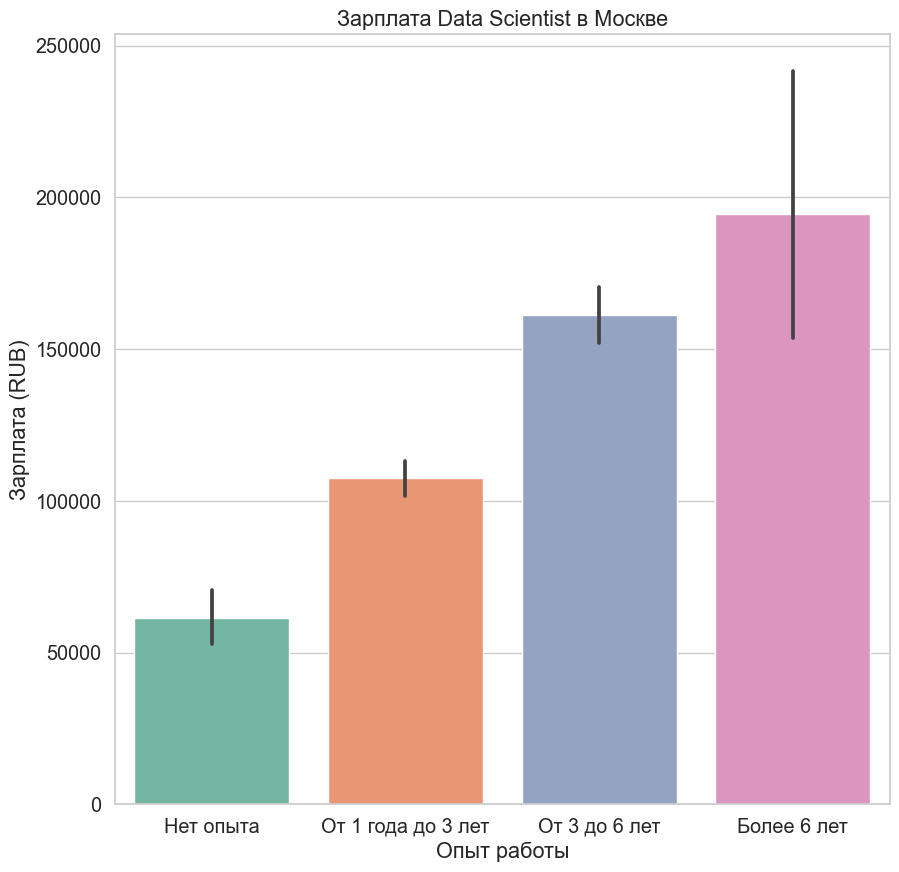

In [1062]:
order_list = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']
plt.figure(figsize=(10, 10))
sns.barplot(y=salary_df['salary'], x=salary_df['experience.name'], order=order_list)
plt.xlabel('Опыт работы')
plt.ylabel('Зарплата (RUB)')
plt.title('Зарплата Data Scientist в Москве')

Мы увидели, что чем больше у вас опыт работы, тем больше вы будете получать зарплату.

Проведите аналогичный анализ для наиболее привлекательной для вас профессии в любом регионе. Если это Data Scientist, то для анализа выберите другую. В данном пункте спокойно можно сделать копипасту кода.

В данной части я сделаю все то же самое, что делал выше, но предметом моего анализа будут вакансии **Директора ресторана** в *Москве*.

In [ ]:
URL = 'https://api.hh.ru/vacancies'

all_data_rest = list()
for page in range(0, 20):
    params = {
        'text': "Директор ресторана",
        'area': 1,
        'page': page,
        'per_page': 100
    }
    req = requests.get(URL, params)
    data = json.loads(req.content.decode())
    all_data_rest.append(data['items'])
    time.sleep(1)

In [ ]:
df_rest = pd.DataFrame()
for item in all_data_rest:
    for i in item:
        tmp_df = pd.json_normalize(i)
        df_rest = pd.concat([df_rest, tmp_df['id']], axis=0).reset_index(drop=True)

In [ ]:
df_rest.columns = ['id']
len(df_rest)

In [ ]:
res_df_rest = pd.DataFrame()
for idx in range(0, len(df_rest)):
    vacancy = df_rest['id'].iloc[idx]
    vacancy_url = f'https://api.hh.ru/vacancies/{vacancy}'
    req = requests.get(vacancy_url)
    vacancy_info = json.loads(req.content.decode())
    tmp_df = pd.json_normalize(vacancy_info)
    res_df_rest = pd.concat([res_df_rest, tmp_df], axis=0).reset_index(drop=True)
    time.sleep(1)

Удалим ненужные столбцы, пустые и повторяющееся строки.

In [ ]:
df_rest = res_df_rest.drop(columns=['premium', 'relations', 'insider_interview', 'response_letter_required', 'address', 'allow_messages', 'department', 'contacts', 'branded_description', 'vacancy_constructor_template', 'accept_handicapped', 'accept_kids', 'archived', 'response_url', 'specializations', 'code', 'hidden', 'quick_responses_allowed', 'driver_license_types', 'accept_incomplete_resumes', 'negotiations_url', 'suitable_resumes_url', 'has_test', 'test', 'working_days', 'working_time_intervals', 'working_time_modes', 'accept_temporary', 'languages', 'billing_type.id', 'billing_type.name', 'area.url', 'area.name', 'area.id', 'type.id', 'type.name', 'schedule.id', 'schedule.name', 'employment.id', 'employment.name', 'employer.trusted', 'salary', 'address.description', 'address.metro', 'address.metro.line_name', 'address.metro.line_id', 'insider_interview.id', 'insider_interview.url', 'employer.logo_urls', 'vacancy_constructor_template.id', 'vacancy_constructor_template.name', 'vacancy_constructor_template.top_picture.height', 'vacancy_constructor_template.top_picture.width', 'vacancy_constructor_template.top_picture.path', 'vacancy_constructor_template.top_picture.blurred_path', 'vacancy_constructor_template.bottom_picture.height', 'vacancy_constructor_template.bottom_picture.width', 'vacancy_constructor_template.bottom_picture.path', 'vacancy_constructor_template.bottom_picture.blurred_path', 'test.required', 'vacancy_constructor_template.bottom_picture', 'initial_created_at', 'created_at', 'published_at', 'address.city', 'address.street', 'address.building', 'address.raw', 'apply_alternate_url', 'alternate_url', 'experience.id', 'employer.url', 'employer.alternate_url', 'employer.logo_urls.original', 'employer.logo_urls.240', 'employer.logo_urls.90', 'employer.vacancies_url', 'department.id', 'department.name'])

In [ ]:
df_rest.head()

Сохраним DataFrame в формате xlsx.

In [ ]:
df_rest.to_excel('output_rest.xlsx')

**Вопрос 1.** Сколько сейчас доступно вакансий по вашему запросу?
Ответ: N=829 вакансий доступно в Москве.

In [1064]:
N_rest = len(df_rest)
N

829

**Вопрос 2.** Какие навыки чаще всего встречаются в вакансиях по данной специальности?

Для этого найдите соответствующее поле в данных из полного описания вакансий, проанализируйте его и составьте список навыков и количество упоминаний каждого. Визуализируйте полученную информацию по топ-15 навыков.

Создадим DaraFrame, где в роле колонок будут навыки, а в строке единицами отмечаем требуется ли этот навык в данной вакансии

In [ ]:
skills_df_rest = pd.DataFrame()
for idx in df_rest.index:
    skills_list = df_rest.at[idx, 'key_skills']
    for skill in skills_list:
        skill_name = skill['name']
        skills_df_rest.at[df_rest.at[idx, 'id'], skill_name] = 1

In [ ]:
df_count_skills_rest = skills_df_rest.sum()
df_count_skills_rest = df_count_skills_rest.sort_values(ascending=False).reset_index()
df_count_skills_rest.columns = ['name', 'count']
df_count_skills_rest.head()

Text(0, 0.5, '')

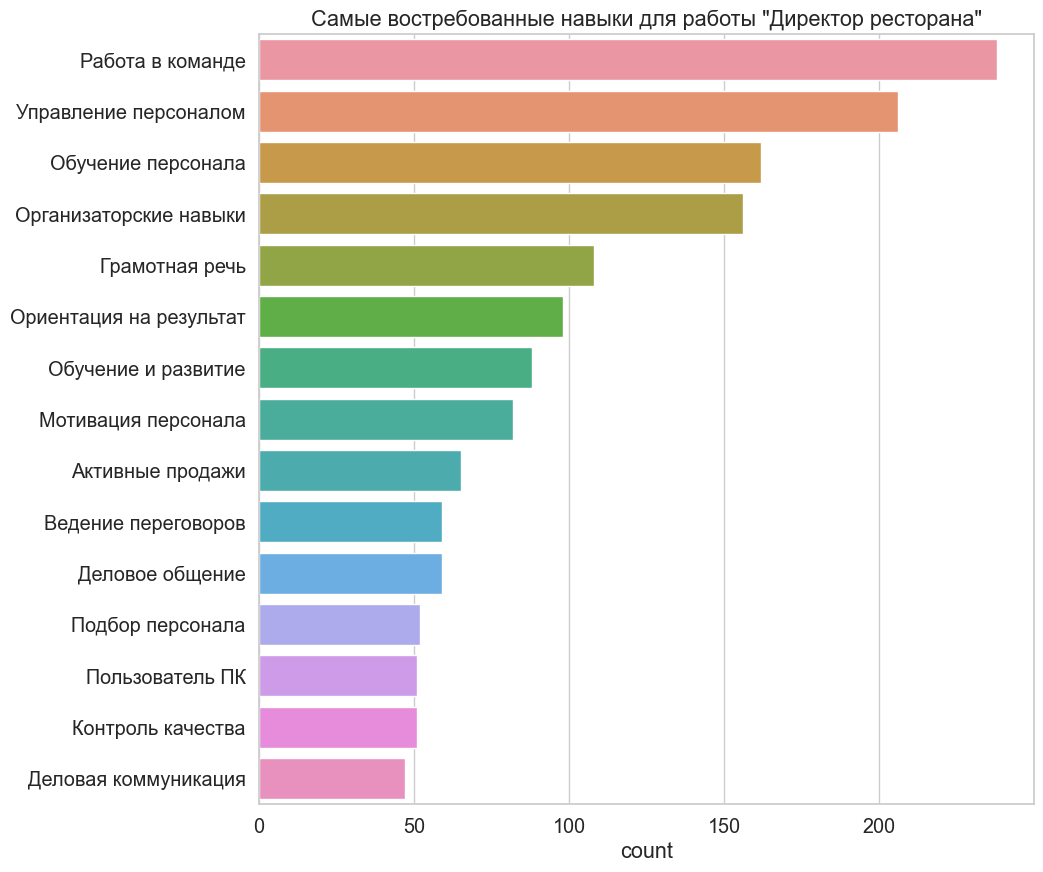

In [1066]:
plt.figure(figsize=(10, 10))
sns.barplot(y=df_count_skills_rest['name'].head(15), x=df_count_skills_rest['count'].head(15))
plt.title('Самые востребованные навыки для работы "Директор ресторана"')
plt.ylabel('')

Здесь можно увидеть разницу, между требованиями к навыкам для работы *Аналитиком* и *Директором ресторана*. В вакансиях *Директора* требуют умение *вести переговоры*, *подбор персонала*, *управление персоналом*, *организаторские навыки*, *грамотная речь*, *умение продавать*.

Конечно, некоторые навыки, требуемые для работы совпадают и там и там. Например, нельзя отрицать, что для аналитика также важно хорошо коммуницировать с коллегами. Но отчетливо понятно, что для директора важны навыки, характеризующие его, как *Управленца*.
От аналитика подобных навыков обычно не требуется.

**Вопрос 3.** Какую зарплату готовы платить работодатели? Соберите некоторым образом статистику и постройте гистограмму.

При работе с данными о заработной плате обратите внимание на валюту и <a target="_blank" href="https://yandex.ru/search/?text=gross%2Fnet&clid=1955455&win=446&lr=213&noreask=1">gross/net</a>. Постоянно подгружать курс валюты не требуется, достаточно фиксировать какой-то один более менее актуальный.

Сделаем все аналогично тому, как мы делали для Аналитика Данных

In [1061]:
df_rest['salary.currency'].unique()

array(['RUR', nan, 'EUR', 'USD'], dtype=object)

In [ ]:
salary_df_rest = df_rest[['id', 'salary.from', 'salary.to', 'salary.currency', 'salary.gross', 'experience.name']]
salary_df_rest.dropna(subset='salary.from', inplace=True)
salary_df_rest['salary'] = salary_df_rest['salary.from']
salary_df_rest.drop(columns=['salary.from', 'salary.to'], inplace=True)
salary_df_rest = salary_df_rest.reset_index(drop=True)

In [ ]:
salary_df_rest['salary'] = salary_df_rest.apply(salary_without_tax, axis=1)
salary_df_rest.drop(columns=['salary.gross'], inplace=True)

In [ ]:
salary_df_rest['salary'] = salary_df_rest.apply(currency_transfer, axis=1)
salary_df_rest.drop(columns=['salary.currency'], inplace=True)

In [ ]:
salary_df_rest.head()

Text(0.5, 1.0, 'Зарплата Директора ресторана в Москве')

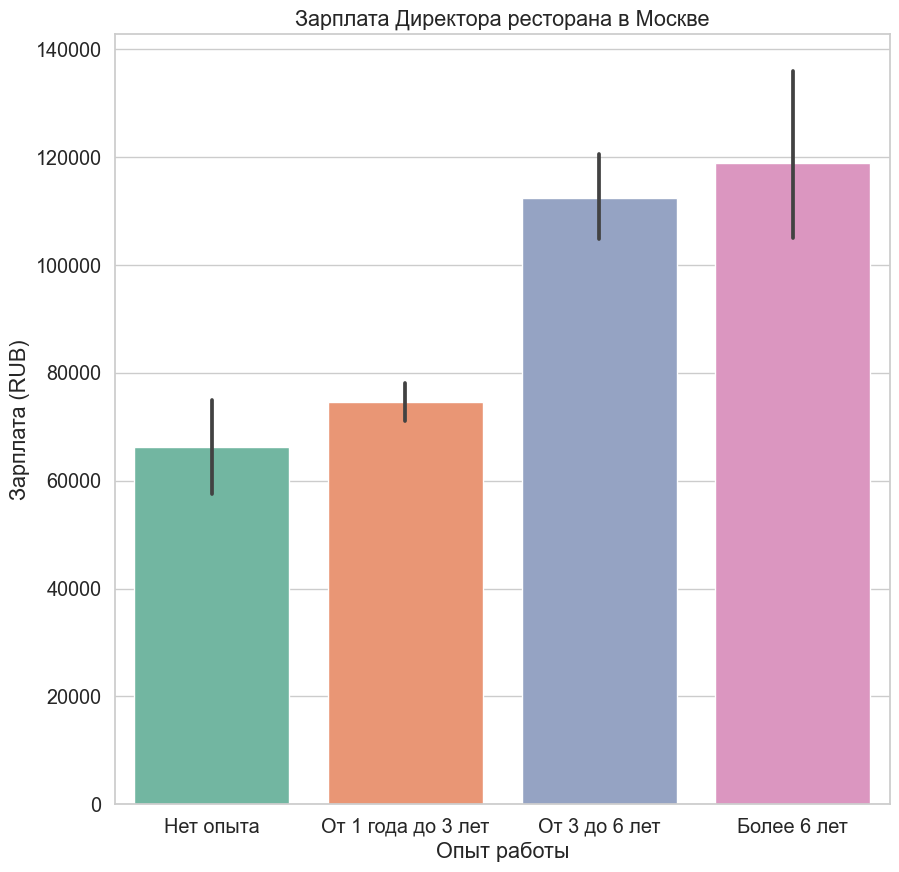

In [1060]:
order_list = ['Нет опыта', 'От 1 года до 3 лет', 'От 3 до 6 лет', 'Более 6 лет']
plt.figure(figsize=(10, 10))
sns.barplot(y=salary_df_rest['salary'], x=salary_df_rest['experience.name'], order=order_list)
plt.xlabel('Опыт работы')
plt.ylabel('Зарплата (RUB)')
plt.title('Зарплата Директора ресторана в Москве')

Не забывайте про выводы.

Мы увидели, что чем больше у вас опыт работы, тем больше вы будете получать зарплату. Это высказывание справедливо и для *аналитиков*, и для *директоров ресторанов*. Если сравнить их зарплаты, то можно увидеть, что люди "без опыта" будут получать примерно одинаково. Но с ростом опыта работы, аналитики будут получать заметно больше.


---
### <font color="orange"><i>Сложная часть</i></font>

### Задача 2.

Для *одной* из рассмотренных ранее профессий ответьте на следующие вопросы:
- Какой опыт требуется для данной вакансии?
- Какие работодатели в топе?
- В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Не забудьте про визуализацию, в частности, постройте распределений вакансий на карте.

*Напоминание.* Работа в некоторой степени творческая, поэтому конкретные детали решения в основном остаются на усмотрение автора решения.


In [ ]:
experience_df = df.groupby('experience.name').agg({'experience.name' : ['count']})
experience_df.reset_index(inplace=True)
experience_df.columns = ['Опыт работы', 'Количество вакансий']
experience_df

Text(0.5, 1.0, 'Вакансии на Аналитика данных в Москве')

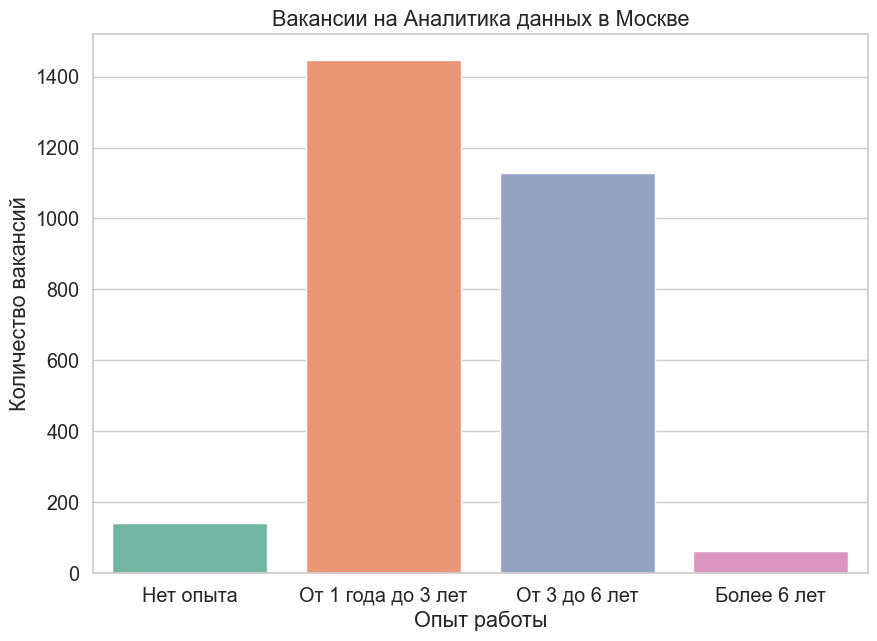

In [1067]:
plt.figure(figsize=(10, 7))
sns.barplot(data=experience_df, x='Опыт работы', y='Количество вакансий', order=order_list)
plt.title('Вакансии на Аналитика данных в Москве')

На графике хорошо видно, что специалисты без опыта не пользуются сильным спросом, по сравнению с опытными аналитиками, опыт которых составляет хотя бы больше 1 года. Также интересно то, что работодателям не нужны в большом количестве люди с опытом более 6 лет.

Воспользуемся готовым DataFrame salary_df, в котором столбец salary учитывает валюту и налоги, а так же значение в нем является средним между salary.from и salary.to. Сделаем merge и уберем всю ненужную информацию о зарплате.

In [ ]:
df = pd.read_excel('output.xlsx', index_col=0)

In [ ]:
df['id'] = df['id'].astype(int)
salary_df['id'] = salary_df['id'].astype(int)

In [ ]:
df = df.merge(salary_df, on='id', how='left')

In [992]:
statics_df = df.groupby(by='employer.name').agg({'salary' : ['mean'], 'name' : ['count']})
statics_df.reset_index(inplace=True)
statics_df.columns = ['employer_name', 'mean_salary', 'count']
statics_df

,employer_name,mean_salary,count
0,12 STOREEZ,NaN,1
1,ABCstaff,NaN,1
2,ADAPTER,NaN,2
3,ADV/web-engineering,NaN,1
4,ALEXBAITLER,NaN,1
...,...,...,...
771,Эффекшн Консалтинг,NaN,1
772,Эшелон Технологии,NaN,1
773,Юрвес,100000.0,1
774,Яндекс,NaN,5


Уберем работодателей у которых меньше 5 вакансий. Сложно говорить о попадании в топ, когда у работодателя одна вакансия на огромную зарплату, а значит шанс туда попасть очень и очень мал. По логике, топ работодателей должен учитывать финансовое положение компании(наличие долгов), или такие факторы, как наличие и размер премий и частота пересмотра заработной платы. Но мы имеем лишь среднюю зарплату по работодателю, по этому будем действовать в рамках данных, которые у нас есть. Также стоит учесть, что многие работодатели не пишут зарплату в объявлении, этот факт так же вносит сильную погрешность в наш рейтинг.

In [994]:
statics_df = statics_df[statics_df['count'] > 5]
statics_df.reset_index(drop=True)
top6_employer = statics_df.sort_values('mean_salary', ascending=False).head(6)

Text(0.5, 1.0, 'Рейтинг работодателей')

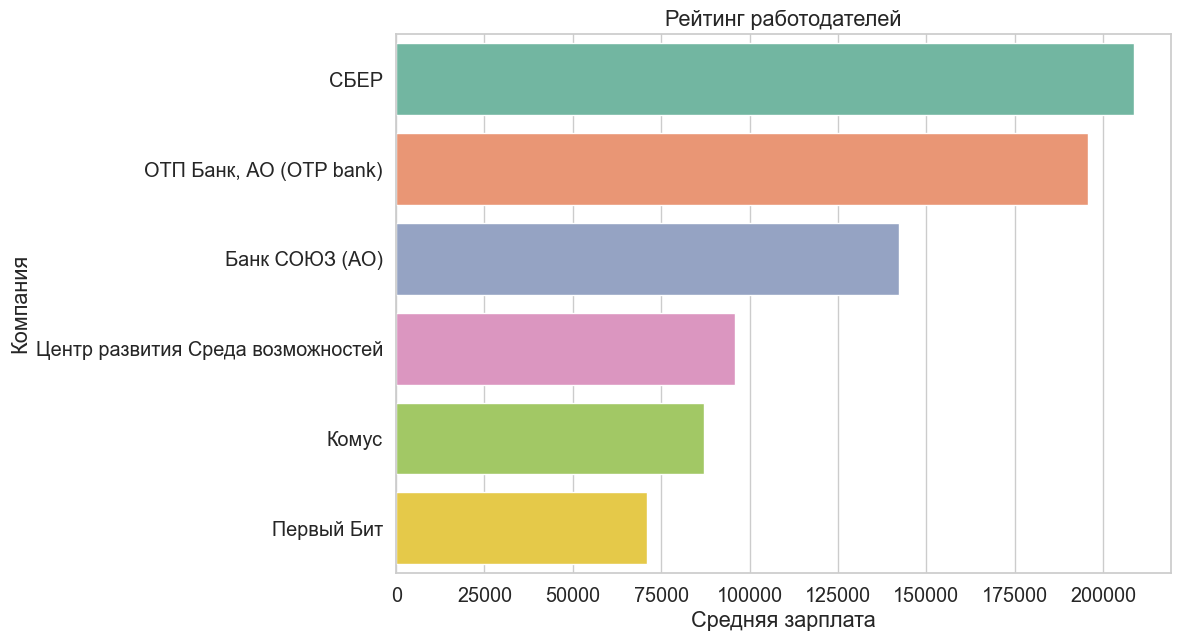

In [995]:
plt.figure(figsize=(10, 7))
sns.barplot(data=top6_employer, y='employer_name', x='mean_salary')
plt.xlabel('Средняя зарплата')
plt.ylabel('Компания')
plt.title('Рейтинг работодателей')

In [996]:
import plotly.express as px

Удалим вакансии, где не указан адрес.

In [997]:
df.dropna(subset='address.lat', inplace=True)

In [999]:
df.reset_index(drop=True, inplace=True)

In [998]:
fig = px.scatter_mapbox(
    data_frame=df,
    lat='address.lat', lon='address.lng',
    center=dict(lat=55.76, lon=37.63),
    mapbox_style="stamen-terrain",
    zoom=10,
    opacity=0.4,
    hover_name='employer.name'
)
fig.update_traces(marker_size=9)
fig.show()
fig.write_html("map.html")

Главный вопрос: В каком районе Москвы данная вакансия пользуется наибольшим и наименьшим спросом?

Я нашел в интернете файл json, из которого можно достать dict формата (metro_name -> district_name). Таким образом мы сможем сопоставить станции метро с названием района. Есть одна проблема, эти данные актуальны только на 2018 год. Учитывая это, придется убрать все вакансии, где фигурируют станции метро, построенные после 2018 года.

Достанем нужный нам словарик *metro_to_district* из файла *metro.json*, взятого из интернета.

In [983]:
df_metro = pd.read_json('metro.json')
metro_df = pd.DataFrame()
tmp = df_metro['stations'].tolist()

In [984]:
for idx in tmp:
    temp = pd.DataFrame(idx)
    metro_df = pd.concat([metro_df, temp], axis=0).reset_index(drop=True)

In [985]:
metro_df.set_index('order', inplace=True)
metro_df.drop(columns=['admArea', 'status'], inplace=True)
metro_df = metro_df.reset_index(drop=True)
metro_df.drop(columns=['lat', 'lng'], inplace=True)

In [990]:
metro_to_district = dict()
for idx in metro_df.index:
    metro_name = metro_df.at[idx, 'name']
    district_name = metro_df.at[idx, 'district']
    metro_to_district[metro_name] = district_name

In [1051]:
metro_to_district

{'Новокосино': 'Новокосино',
 'Новогиреево': 'Новогиреево',
 'Перово': 'Новогиреево',
 'Шоссе Энтузиастов': 'Перово',
 'Авиамоторная': 'Лефортово',
 'Площадь Ильича': 'Таганский',
 'Марксистская': 'Таганский',
 'Третьяковская': 'Замоскворечье',
 'Петровский парк': 'Аэропорт',
 'ЦСКА': 'Хорошёвский',
 'Хорошевская': 'Хорошёвский',
 'Шелепиха': 'Пресненский',
 'Деловой центр': 'Пресненский',
 'Парк Победы': 'Дорогомилово',
 'Минская': 'Дорогомилово',
 'Ломоносовский проспект': 'Раменки',
 'Раменки': 'Раменки',
 'Ховрино': 'Ховрино',
 'Речной вокзал': 'Левобережный',
 'Водный стадион': 'Головинский',
 'Войковская': 'Войковский',
 'Сокол': 'Сокол',
 'Аэропорт': 'Аэропорт',
 'Динамо': 'Аэропорт',
 'Белорусская': 'Тверской',
 'Маяковская': 'Тверской',
 'Тверская': 'Тверской',
 'Театральная': 'Тверской',
 'Новокузнецкая': 'Замоскворечье',
 'Павелецкая': 'Замоскворечье',
 'Автозаводская': 'Даниловский',
 'Технопарк': 'Нагатино-Садовники',
 'Коломенская': 'Нагатино-Садовники',
 'Каширская': 'На

In [1003]:
df.dropna(subset='address.metro.station_name', inplace=True)

In [1021]:
for idx in df.index:
    name_station = df.at[idx, 'address.metro.station_name']
    if name_station not in metro_to_district:
        df.drop(labels=[idx], axis=0)
    else:
        df.at[idx, 'district'] = metro_to_district[name_station]

In [1024]:
sort_district_df = df.groupby('district').agg({'district' : ['count']})

In [ ]:
sort_district_df.reset_index(inplace=True)
sort_district_df.columns = ['name', 'count']

In [1037]:
sort_district_df.sort_values('count', ascending=False, inplace=True)
top10_district = sort_district_df.head(10)

Text(0.5, 1.0, 'Районы с самым высоким спросом на Аналитиков')

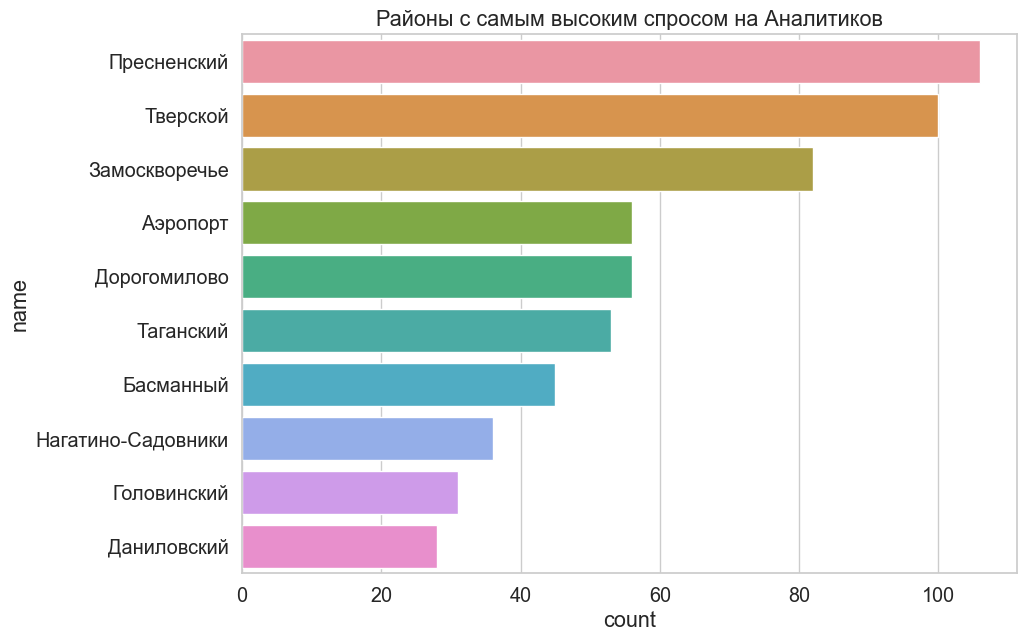

In [1041]:
plt.figure(figsize=(10, 7))
sns.barplot(data=top10_district, y='name', x='count')
plt.title('Районы с самым высоким спросом на Аналитиков')

Таким образом район с самым большим спросом на вакансию -- **Пресненский район**

In [1058]:
sort_district_df.sort_values('count', ascending=True, inplace=True)
worst10_district = sort_district_df.head(25)

Text(0.5, 1.0, 'Районы с самым маленьким спросом на Аналитиков')

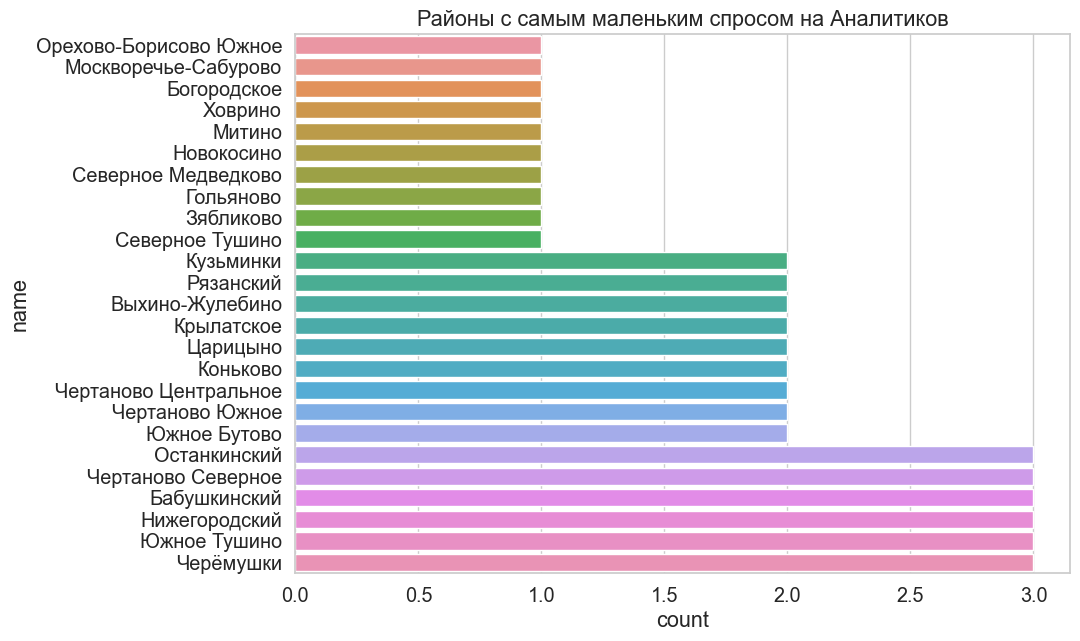

In [1059]:
plt.figure(figsize=(10, 7))
sns.barplot(data=worst10_district, y='name', x='count')
plt.title('Районы с самым маленьким спросом на Аналитиков')

Говоря о районе с самым маленьким спросом, надо учесть некоторые неточности, которое у нас есть.
1. Учитываются станции метро построенные до 2018 года.
2. Возможно есть станции метро, которых нет в вакансиях, а значит у нас нет информации по ним.

Учитывая эти факты ответить на вопрос *однозначно* не получится.
Выше я нарисовал график, отображающий районы с минимальным спросом с 1-3 вакансиями на район.

Какие выводы можно сделать из построенных графиков?

Проанализировав вакансии "Аналитик данных" в Москве, я пришел к выводу, что большой спрос на людей с опытом работы больше 1-2 года, найти работу такому специалисту будет ощутимо проще, чем специалисту без опыта. Также стоит отметить, что концентрация офисов компаний очень высока в центре города и в окрестностях Москва-Сити.
Говорят о топе работодателей, стоит подчеркнуть, что топ3 работодателя в моем рейтинге - это банки(СБЕР, ОТП, СОЮЗ). А значит в банковском секторе достаточно большой спрос на *аналитиков данных*.
Конечно, также мы нашли районы в Москве с максимальным и минимальным спросом на нашу вакансию. В районах центра города спрос на вакансию наибольший, а на окраинах города - спрос наименьшей, чего и стоило ожидать.